In [376]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate

m = 1.67e-27*2 #[kg] mass of H2 molecule
k = 1.38064852e-23/1.6e-19 #[eV/K]
k1 = 1.38064852e-23 #[m2 kg s-2 K-1]
T =  300 # [K]
print(T)
# H2+ + e -> 2H Janev++ 73p k8
# H3+ + e -> H2 + H Janev++ 98p k9
# H2+ + H2 -> H3+ + H Janev++ 88p 하단부터 k11

def xsk8(E):
    return 17.3e-20*(1/(E*(1+1.1*E**0.512+0.011*E**3.1))+0.133*np.exp(-0.35*(E-6.05)**2))

def xsk9(E):
    return 3e-20/(E**0.725*(1+4.45*E**1.2))+1/(1/(0.0646*E**1.478*1e-16)+1/(634.22/E**2.605*1e-16))

def xsk11(Te):
    return 17.76e-20/(Te**0.477*(1+0.0291*Te**3.61+1.53e-5*Te**6.55)) #[m2 단위]

def maxwellian_v(v):
    return (m/2/np.pi/k1/T)**1.5*4*np.pi*v**2*np.exp(-m*v**2/2/k1/T)

def eV_to_m_s(E):
    return np.sqrt(2*E*1.6e-19/m) #[m/s]

300


<img src = 'H3+.png' width="50%">
<img src = 'Lieber_max.png' width="60%">

In [377]:
#Energy setting
E_list = np.arange(1e-4, 10,1e-5) #[eV]
v_list = eV_to_m_s(E_list) #[m/s]
#Cross section setting [m2]
xs_list = xsk11(E_list)
result = integrate.trapz(maxwellian_v(v_list)*xs_list,v_list)
print(result*1e6) #[cm3/s]

1.1267203711645573e-12


0.9998199662850431


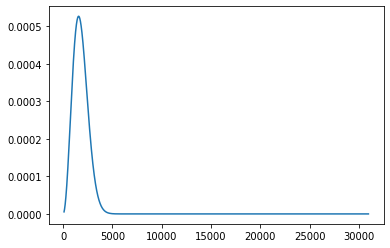

In [378]:
plt.plot(v_list,maxwellian_v(v_list))
result = integrate.trapz(maxwellian_v(v_list),v_list)
print(result)

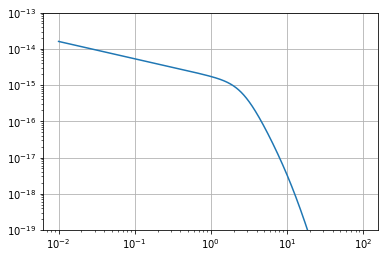

In [274]:
plt.plot(E_list,xs_list*1e4)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19,1e-13)
plt.grid(True,axis='both')
plt.savefig('ad.png')

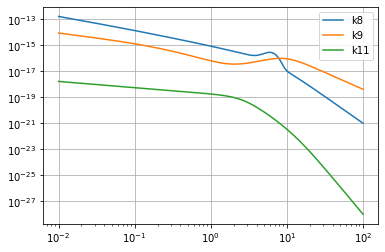

In [240]:
plt.plot(E_list,xsk8(E_list),E_list,xsk9(E_list),E_list,xsk11(E_list))
plt.xscale("log")
plt.yscale('log')
plt.legend(['k8','k9','k11','k11_2'],loc = 'upper right')
plt.grid(True)

In [41]:
data = pd.DataFrame(xsk11(E_list),E_list)
data.to_csv('k11.csv',sep='\t')

In [28]:
1/40

0.025

In [35]:
data.to_csv?